In [7]:
DATA_TR = []
DATA_V = []
DATA_T = []

import pickle
with open('data_split.pkl') as f:
    DATA_TR, DATA_V, DATA_T = pickle.load(f)

In [12]:
DATA = DATA_TR + DATA_V + DATA_T

In [125]:
cut_grades = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_grades = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_grades = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3']

carat = []
x = []
y = []
z = []
price = []
table = []
depth = []
cut = []
color = []
clarity = []
for d in DATA:
    carat.append(float(d['carat']))
    x.append(float(d['x']))
    y.append(float(d['y']))
    z.append(float(d['z']))
    table.append(float(d['table']))
    depth.append(float(d['depth']))
    price.append(float(d['price']))
    cut.append(cut_grades.index(d['cut']))
    color.append(color_grades.index(d['color']))
    clarity.append(clarity_grades.index(d['clarity']))

In [126]:
DATA[0:10]

[{'': '9774',
  'carat': '0.91',
  'clarity': 'VVS2',
  'color': 'I',
  'cut': 'Ideal',
  'depth': '60.6',
  'price': '4663',
  'table': '57',
  'x': '6.25',
  'y': '6.27',
  'z': '3.79'},
 {'': '45824',
  'carat': '0.55',
  'clarity': 'VVS1',
  'color': 'I',
  'cut': 'Ideal',
  'depth': '62.7',
  'price': '1712',
  'table': '57',
  'x': '5.23',
  'y': '5.17',
  'z': '3.26'},
 {'': '2123',
  'carat': '0.77',
  'clarity': 'VS1',
  'color': 'G',
  'cut': 'Ideal',
  'depth': '62.4',
  'price': '3121',
  'table': '54',
  'x': '5.93',
  'y': '5.89',
  'z': '3.69'},
 {'': '50014',
  'carat': '0.7',
  'clarity': 'SI1',
  'color': 'F',
  'cut': 'Ideal',
  'depth': '61.3',
  'price': '2196',
  'table': '57',
  'x': '5.76',
  'y': '5.79',
  'z': '3.54'},
 {'': '44821',
  'carat': '0.5',
  'clarity': 'VS1',
  'color': 'G',
  'cut': 'Very Good',
  'depth': '62.1',
  'price': '1624',
  'table': '55',
  'x': '5.06',
  'y': '5.22',
  'z': '3.19'},
 {'': '10325',
  'carat': '1.03',
  'clarity': 'SI2',

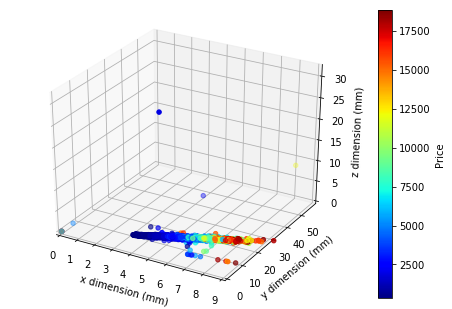

In [127]:
# plot x, y, z relationships to determine visually how price is determined by size

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors

cm = plt.get_cmap('jet')
cNorm = matplotlib.colors.Normalize(vmin=min(price), vmax = max(price))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x, y, z, c=scalarMap.to_rgba(price))
scalarMap.set_array(price)
fig.colorbar(scalarMap, label="Price")
ax.set_xlabel('x dimension (mm)')
ax.set_ylabel('y dimension (mm)')
ax.set_zlabel('z dimension (mm)')
ax.set_zlim(0, 32)
ax.set_xlim(0, 9)
ax.set_ylim(0, 59)

plt.show()

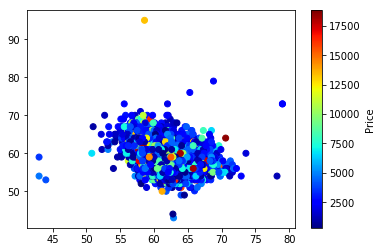

In [128]:
# plot depth by table and price to see if there is any correlation between any of the axes and price

plt.scatter(depth, table, c=scalarMap.to_rgba(price))
plt.colorbar(scalarMap, label="Price")
plt.show()

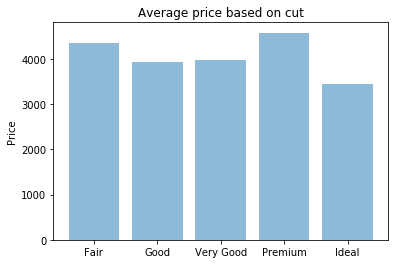

In [129]:
# plot cut grade by price

cut_counts = [0] * 5
cut_prices = [0.0] * 5
for x in xrange(len(DATA)):
    cut_counts[cut[x]] += 1
    cut_prices[cut[x]] += price[x]
avg_prices = [a/b for a,b in zip(cut_prices, cut_counts)]

objects = cut_grades
y_pos = np.arange(len(objects))
performance = avg_prices
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Price')
plt.title('Average price based on cut')
 
plt.show()

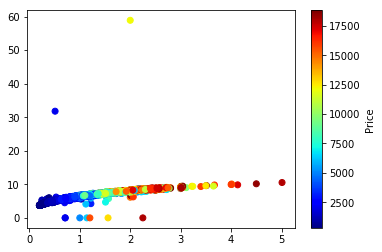

In [131]:
# plot carat by dimension to see if there is correlation between the two and the price

plt.scatter(carat, y, c=scalarMap.to_rgba(price))
plt.colorbar(scalarMap, label="Price")
plt.show()

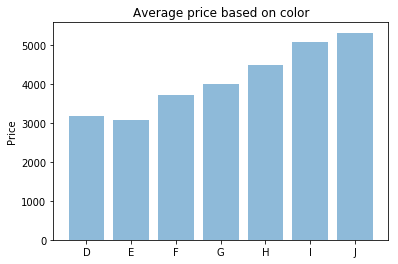

In [132]:
# plot color grades by price

color_counts = [0] * 7
color_prices = [0.0] * 7
for x in xrange(len(DATA)):
    color_counts[color[x]] += 1
    color_prices[color[x]] += price[x]
avg_prices = [a/b for a,b in zip(color_prices, color_counts)]

objects = color_grades
y_pos = np.arange(len(objects))
performance = avg_prices
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Price')
plt.title('Average price based on color')
 
plt.show()

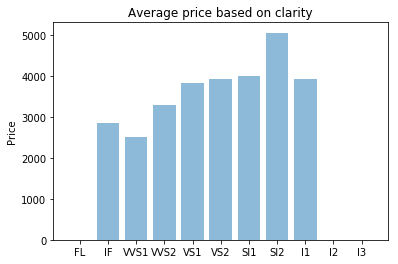

In [133]:
# plot clarity grades by price

clarity_counts = [0] * 11
clarity_prices = [0.0] * 11
for x in xrange(len(DATA)):
    clarity_counts[clarity[x]] += 1
    clarity_prices[clarity[x]] += price[x]
avg_prices = [a/b if b!=0 else 0 for a,b in zip(clarity_prices, clarity_counts)]

objects = clarity_grades
y_pos = np.arange(len(objects))
performance = avg_prices
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Price')
plt.title('Average price based on clarity')
 
plt.show()